In [17]:
import pandas as pd

series = pd.read_csv(
    "battery_wl.csv",
    index_col=0,
    parse_dates=True,
).squeeze()


In [18]:
series

Date-Time (GMT)
1920-06-01 05:00:00   -0.659
1920-06-01 06:00:00   -0.873
1920-06-01 07:00:00   -1.025
1920-06-01 08:00:00   -0.964
1920-06-01 09:00:00   -0.659
                       ...  
2020-03-31 19:00:00    0.644
2020-03-31 20:00:00    0.498
2020-03-31 21:00:00    0.253
2020-03-31 22:00:00    0.005
2020-03-31 23:00:00   -0.118
Name: Water Elevation [m NAVD88], Length: 809903, dtype: float64

In [19]:
series = (
    series
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
    .loc[pd.to_datetime("1925"):]
)
series = series - (series.index.array - pd.to_datetime("1992")
                   ) / pd.to_timedelta("365.2425D") * 2.87e-3

In [20]:
series

Date-Time (GMT)
1926-11-20 05:00:00   -0.411120
1926-11-20 06:00:00   -0.777120
1926-11-20 07:00:00   -1.051120
1926-11-20 08:00:00   -1.051121
1926-11-20 09:00:00   -0.808121
                         ...   
2020-03-31 19:00:00    0.562925
2020-03-31 20:00:00    0.416925
2020-03-31 21:00:00    0.171924
2020-03-31 22:00:00   -0.076076
2020-03-31 23:00:00   -0.199076
Name: Water Elevation [m NAVD88], Length: 796751, dtype: float64

In [3]:
from pyextremes import EVA

model = EVA(series)

In [4]:
model.get_extremes(method="BM", block_size="365.2425D")


(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='Date-Time (GMT)', ylabel='Water Elevation [m NAVD88]'>)

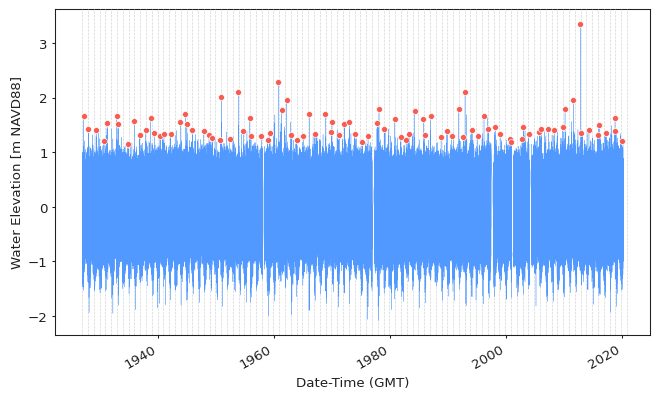

In [5]:
model.plot_extremes()

In [12]:
model.fit_model(distribution='expon')


c:\Users\sandros\AppData\Local\Programs\Python\Python38\lib\site-packages\pyextremes\eva.py:1012: RuntimeWarning: 'expon' distribution is not recommended to be used with extremes extracted using the 'BM' method, 'genextreme' or 'gumebel_r' should be used per the Fisher-Tippet-Gnedenko theorem
  warnings.warn(


In [13]:
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             796,751
Start:                      November 1926      End:                           March 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                 94      Extraction method:                     BM
Type:                                high      Block size:             365 days 05:49:12
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

In [14]:
summary = model.get_summary(
    return_period=[1, 2, 5, 10, 25, 50, 100, 250, 500, 1000],
    alpha=0.95,
    n_samples=1000,
)


In [15]:
print(summary)


               return value  lower ci  upper ci
return period                                  
1.0                1.151129  1.151129  1.151129
2.0                1.384356  1.346457  1.431053
5.0                1.692666  1.604667  1.801091
10.0               1.925894  1.799995  2.081015
25.0               2.234203  2.058204  2.451054
50.0               2.467431  2.253532  2.730977
100.0              2.700658  2.448860  3.010901
250.0              3.008968  2.707070  3.380939
500.0              3.242195  2.902398  3.660863
1000.0             3.475423  3.097726  3.940786


(<Figure size 768x768 with 4 Axes>,
 (<AxesSubplot:title={'center':'Return value plot'}, xlabel='Return period', ylabel='Water Elevation [m NAVD88]'>,
  <AxesSubplot:title={'center':'Probability density plot'}, xlabel='Water Elevation [m NAVD88]', ylabel='Probability density'>,
  <AxesSubplot:title={'center':'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <AxesSubplot:title={'center':'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

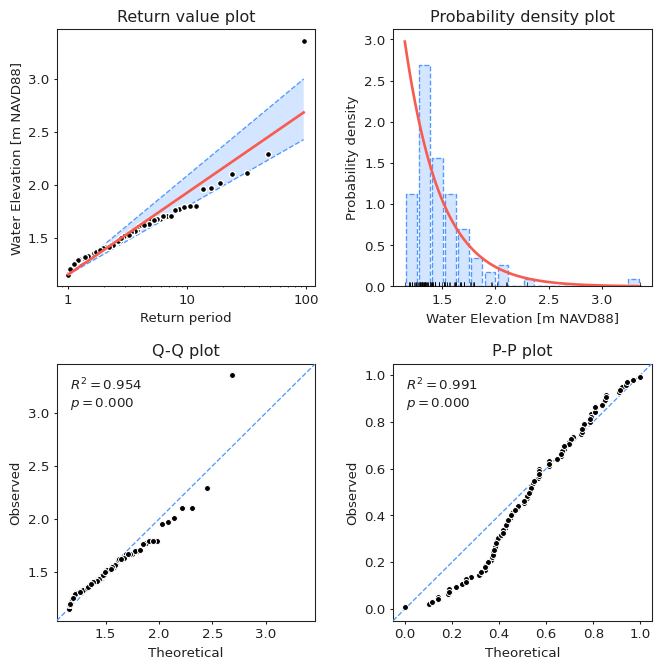

In [16]:
model.plot_diagnostic(alpha=0.95)
